In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TRAIN_1 = True
TRAIN_2 = True

In [ ]:
DAYS = 30
BATCH_SIZE = 32
EPOCHS = 50
FEATURES = 14

#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random
import pickle
from sklearn.model_selection import train_test_split
from tqdm import tqdm


#Reading final dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/FYP/Dataset_final/2011-to-2022.csv')
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company_Code,year,score
0,144.05,145.55,146.40,143.05,145.50,145.05,145.15,487210,7.071712e+12,0.0,283277.0,0.5814,0,2011,0.0
1,145.05,146.95,150.50,144.55,150.20,148.55,146.83,812777,1.193423e+13,0.0,390172.0,0.4800,0,2011,0.0
2,148.55,150.10,158.80,149.30,157.20,157.60,154.69,3254352,5.034284e+13,0.0,936671.0,0.2878,0,2011,0.0
3,157.60,158.30,160.00,154.00,154.15,154.95,157.31,1874274,2.948396e+13,0.0,672025.0,0.3586,0,2011,0.0
4,154.95,155.00,155.30,146.10,146.85,147.25,150.08,781973,1.173587e+13,0.0,265897.0,0.3400,0,2011,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137538,259.45,262.00,264.05,259.30,261.00,261.00,261.63,6874717,1.798606e+14,104910.0,2174704.0,0.3163,48,2022,0.0
137539,261.00,260.00,261.25,252.30,253.30,253.80,255.66,9546533,2.440628e+14,76628.0,2703588.0,0.2832,48,2022,0.0
137540,253.80,256.35,256.80,247.60,256.40,255.60,251.84,13389263,3.371917e+14,107614.0,3822847.0,0.2855,48,2022,0.0
137541,255.60,258.50,259.35,247.00,247.95,248.15,251.71,10858160,2.733099e+14,68711.0,3218625.0,0.2964,48,2022,0.0


In [ ]:
#Validation data 2022
df_testing = df[df['year'] == 2022]
df_testing = df_testing.drop(['year'], axis = 1)

In [ ]:
df = df[df['year'] != 2022]
df = df.reset_index(drop = True)

In [ ]:
df_testing = df_testing.reset_index(drop = True)

In [ ]:
df = df.drop(['year'], axis = 1)

In [ ]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company_Code,score
0,144.05,145.55,146.40,143.05,145.50,145.05,145.15,487210,7.071712e+12,0.0,283277.0,0.5814,0,0.0
1,145.05,146.95,150.50,144.55,150.20,148.55,146.83,812777,1.193423e+13,0.0,390172.0,0.4800,0,0.0
2,148.55,150.10,158.80,149.30,157.20,157.60,154.69,3254352,5.034284e+13,0.0,936671.0,0.2878,0,0.0
3,157.60,158.30,160.00,154.00,154.15,154.95,157.31,1874274,2.948396e+13,0.0,672025.0,0.3586,0,0.0
4,154.95,155.00,155.30,146.10,146.85,147.25,150.08,781973,1.173587e+13,0.0,265897.0,0.3400,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133569,331.80,332.00,333.70,315.50,316.30,317.95,323.29,22394765,7.240056e+14,172965.0,4423871.0,0.1975,48,0.0
133570,317.95,317.95,325.40,317.00,321.00,321.50,321.98,14889633,4.794207e+14,94630.0,1727903.0,0.1160,48,0.0
133571,321.50,322.00,324.85,316.70,317.80,317.95,320.63,10749681,3.446689e+14,70727.0,1837365.0,0.1709,48,0.0
133572,317.95,319.80,321.50,314.00,317.80,318.10,318.41,13792892,4.391752e+14,85220.0,2390698.0,0.1733,48,0.0


#Scaling Input

In [ ]:
sc = MinMaxScaler((0, 1))
training_set = df.values
training_set_sc = sc.fit_transform(training_set)
df_normalized = pd.DataFrame(training_set_sc)
df_normalized.columns = df.columns
df_normalized = df_normalized.reset_index(drop = True)
df_normalized

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company_Code,score
0,0.002562,0.002584,0.002499,0.002870,0.002601,0.002593,0.002561,0.001247,0.000198,0.000000,0.001218,0.568967,0.0,0.499992
1,0.002593,0.002626,0.002621,0.002917,0.002745,0.002700,0.002613,0.002081,0.000335,0.000000,0.001678,0.464356,0.0,0.499992
2,0.002700,0.002720,0.002870,0.003063,0.002958,0.002975,0.002851,0.008332,0.001412,0.000000,0.004028,0.266068,0.0,0.499992
3,0.002975,0.002966,0.002906,0.003208,0.002865,0.002895,0.002931,0.004799,0.000827,0.000000,0.002890,0.339111,0.0,0.499992
4,0.002895,0.002867,0.002765,0.002964,0.002643,0.002660,0.002711,0.002002,0.000329,0.000000,0.001143,0.319922,0.0,0.499992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133569,0.008286,0.008176,0.008104,0.008190,0.007811,0.007864,0.007974,0.057337,0.020312,0.105273,0.019025,0.172908,1.0,0.499992
133570,0.007864,0.007755,0.007855,0.008236,0.007954,0.007972,0.007934,0.038122,0.013450,0.057595,0.007431,0.088827,1.0,0.499992
133571,0.007972,0.007876,0.007839,0.008227,0.007856,0.007864,0.007893,0.027522,0.009670,0.043047,0.007902,0.145466,1.0,0.499992
133572,0.007864,0.007810,0.007739,0.008144,0.007856,0.007868,0.007825,0.035314,0.012321,0.051868,0.010281,0.147942,1.0,0.499992


In [ ]:
list_company_code = df_normalized['Company_Code'].unique().tolist()

#Initializing feature vector

In [ ]:
X = []
Y = []
for i in list_company_code:
  temp = df_normalized[df_normalized["Company_Code"]==i]
  training_set_sc = temp.values
  for i in range(DAYS, len(training_set_sc)):
      X.append(training_set_sc[i-DAYS:i, 0:FEATURES])    
      Y.append(training_set_sc[i, 5])                        
X, Y = np.array(X), np.array(Y)
len(X), len(Y)

(132104, 132104)

In [ ]:
X.shape

(132104, 30, 14)

#LSTM Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
def get_lstm():
  regressor = Sequential()
  regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], FEATURES)))
  regressor.add(Dropout(rate = 0.1))
  # ##add 2nd lstm layer
  regressor.add(LSTM(units = 75, return_sequences = True))
  regressor.add(Dropout(rate = 0.1))
  # ##add 3rd lstm layer
  regressor.add(LSTM(units = 50, return_sequences = True))
  regressor.add(Dropout(rate = 0.1))
  ##add 4th lstm layer
  regressor.add(LSTM(units = 25, return_sequences = False))
  regressor.add(Dropout(rate = 0.1))
  regressor.add(Dense(units = 1))
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return regressor



#CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


In [ ]:
def get_cnn():
  model = Sequential()
  model.add(Conv1D(filters = 16, kernel_size =3, padding='same', activation='relu', input_shape = (30, FEATURES)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Conv1D(32, 3 , padding='same', activation="relu"))
  model.add(MaxPooling1D(2))
  # model.add(Conv1D(64, 3, padding='same', activation="relu"))
  # model.add(MaxPooling1D(2))
  model.add(Flatten())
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

#Split train & test set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], FEATURES))

In [ ]:
X_train.shape

(105683, 30, 14)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], FEATURES))
Y_test = np.reshape(Y_test, (len(Y_test), 1))

#Methods for reshaping arrays

In [ ]:
def flatten(values):
  temp = []
  for each in values:
    temp.append(each[0])
  return temp

In [ ]:
def change_shape(array):
  temp = []
  for each in array:
    temp.append([each])
  temp = np.array(temp)
  return temp

In [ ]:
def denormalize(array):
  res = change_shape(array)
  res = np.pad(res,((0,0),(0,FEATURES-1)),'constant')
  res = sc.inverse_transform(res)
  res = np.delete(res, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], axis=1)
  return res


#stacking regressor

In [ ]:
def cross_validation(model, x, y):
  pred = model.predict(x)
  return pred

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import pickle
import tensorflow as tf


defining callbacks

In [ ]:
from keras.callbacks import EarlyStopping


In [ ]:
class StackedRegressor:
  estimator_1 = None
  estimator_2 = None
  final_estimator = None
  estimator_1_pred = []
  estimator_2_pred = []
  final_estimator_pred = []
  lstm_cross_val_pred = []
  cnn_cross_val_pred = []
  rfr_cross_val_pred = []

  def fit(self, xTrain , yTrain):
    filepath = '/content/drive/My Drive/FYP/model/Ensemble Models with Sentiments/lstm_dropout_0.1.sav'
    if TRAIN_1:
      checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath,
      monitor="val_loss",
      verbose=0,
      save_best_only=True,
      save_weights_only=False,
      mode="auto",
      save_freq="epoch",
      options=None,
      initial_value_threshold=None)
      es = EarlyStopping(monitor='loss', patience=3)
      self.estimator_1 = get_lstm()
      self.estimator_1.fit(xTrain, yTrain, batch_size = 64, epochs = EPOCHS, callbacks= [es, checkpoint_callback])
      pickle.dump(self.estimator_1, open(filepath, 'wb'))

      self.lstm_cross_val_pred = cross_validation(self.estimator_1, xTrain, yTrain)
      self.lstm_cross_val_pred = flatten(self.lstm_cross_val_pred)
    else:
      self.estimator_1 = pickle.load(open(filepath, 'rb'))
      self.lstm_cross_val_pred = cross_validation(self.estimator_1, xTrain, yTrain)
      self.lstm_cross_val_pred = flatten(self.lstm_cross_val_pred)
    # print("LSTM cross val predictions \n", self.lstm_cross_val_pred[:10])

    filepath = '/content/drive/My Drive/FYP/model/Ensemble Models with Sentiments/cnn_2_layers.sav'
    if TRAIN_2:
      checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath,
      monitor="val_loss",
      verbose=0,
      save_best_only=True,
      save_weights_only=False,
      mode="auto",
      save_freq="epoch",
      options=None,
      initial_value_threshold=None)
      es = EarlyStopping(monitor='loss', patience=3)
      self.estimator_2 = get_cnn()
      self.estimator_2.fit(xTrain, yTrain, epochs = EPOCHS, batch_size = BATCH_SIZE, callbacks = [es, checkpoint_callback])
      pickle.dump(self.estimator_2, open(filepath, 'wb'))
      self.cnn_cross_val_pred = cross_validation(self.estimator_2, xTrain, yTrain)
      self.cnn_cross_val_pred = flatten(self.cnn_cross_val_pred)
    else:
      self.estimator_2 = pickle.load(open(filepath, 'rb'))
      self.cnn_cross_val_pred = cross_validation(self.estimator_2, xTrain, yTrain)
      self.cnn_cross_val_pred = flatten(self.cnn_cross_val_pred)
    # print("CNN cross val predictions\n", self.cnn_cross_val_pred[:10])

    newTrain = [list(a) for a in zip(self.lstm_cross_val_pred, self.cnn_cross_val_pred)]

    # print("new train", newTrain[:10])
    self.final_estimator = RandomForestRegressor(n_estimators=100, random_state=0)
    self.final_estimator.fit(newTrain, yTrain)
    self.rfr_cross_val_pred = cross_val_predict(self.final_estimator, newTrain, yTrain, cv=3)
    return self.final_estimator
  
    

  def predict(self, xTest):
    self.estimator_1_pred = self.estimator_1.predict(xTest)
    self.estimator_1_pred = flatten(self.estimator_1_pred)
    # print(self.estimator_1_pred[:10])

    self.estimator_2_pred = self.estimator_2.predict(xTest) 
    self.estimator_2_pred = flatten(self.estimator_2_pred)

    newTest = [list(a) for a in zip(self.estimator_1_pred, self.estimator_2_pred)]
    # print('Test: ', newTest[:10])
    self.estimator_1_pred = denormalize(self.estimator_1_pred)
    self.estimator_2_pred = denormalize(self.estimator_2_pred)

    self.final_estimator_pred = self.final_estimator.predict(newTest)
    self.final_estimator_pred = denormalize(self.final_estimator_pred)

    

  
    return self.final_estimator_pred

  def performance(self, real_stock_price):
    print("Performace Evaluation - LSTM\n")
    print("RMSE:", mean_squared_error(real_stock_price, self.estimator_1_pred, squared = False))
    print("MAE:", (mean_absolute_error(real_stock_price, self.estimator_1_pred)))
    print("MAPE:", ((mean_absolute_percentage_error(real_stock_price, self.estimator_1_pred)) * 100))
    print("\n\n")
    print("Performace Evaluation - CNN\n")
    print("RMSE:", mean_squared_error(real_stock_price, self.estimator_2_pred, squared = False))
    print("MAE:", (mean_absolute_error(real_stock_price, self.estimator_2_pred)))
    print("MAPE:", ((mean_absolute_percentage_error(real_stock_price, self.estimator_2_pred)) * 100))
    print("\n\n")
    print("Performance Evaluation - Ensemble")
    print("RMSE:", mean_squared_error(real_stock_price, self.final_estimator_pred, squared = False))
    print("MAE:", (mean_absolute_error(real_stock_price, self.final_estimator_pred)))
    print("MAPE:", ((mean_absolute_percentage_error(real_stock_price, self.final_estimator_pred)) * 100))

  #plot ensemble graph
  def plot_final(self, real_stock_price):
    plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
    plt.plot(self.final_estimator_pred, color = 'blue', label = 'Predicted Stock Price')
    plt.title('Stock Price Prediction - Ensemble')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    # plt.xlim([257, 614])
    plt.show()
    
  #plot lstm and cnn graphs
  def plot_individual(self, real_stock_price):
    plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
    plt.plot(self.estimator_1_pred, color = 'blue', label = 'Predicted Stock Price')
    plt.title('Stock Price Prediction - LSTM')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    # plt.xlim([257, 614])
    plt.show()
    
    plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
    plt.plot(self.estimator_2_pred, color = 'blue', label = 'Predicted Stock Price')
    plt.title('Stock Price Prediction - CNN')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    # plt.xlim([257, 614])
    plt.show()
    


In [ ]:
Y_train.shape

(105683,)

Initializing stacked regressor

In [ ]:
regressor = StackedRegressor()
regressor.fit(X_train, Y_train) #training


Epoch 1/50
1652/1652 [==============================] - ETA: 0s - loss: 3.2477e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 188s 109ms/step - loss: 3.2477e-04
Epoch 2/50
1652/1652 [==============================] - ETA: 0s - loss: 1.6918e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 177s 107ms/step - loss: 1.6918e-04
Epoch 3/50
1652/1652 [==============================] - ETA: 0s - loss: 1.4499e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 177s 107ms/step - loss: 1.4499e-04
Epoch 4/50
1652/1652 [==============================] - ETA: 0s - loss: 1.3775e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 177s 107ms/step - loss: 1.3775e-04
Epoch 5/50
1652/1652 [==============================] - ETA: 0s - loss: 1.2618e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 178s 108ms/step - loss: 1.2618e-04
Epoch 6/50
1652/1652 [==============================] - ETA: 0s - loss: 1.2106e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 176s 106ms/step - loss: 1.2106e-04
Epoch 7/50
1652/1652 [==============================] - ETA: 0s - loss: 1.0552e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 173s 105ms/step - loss: 1.0552e-04
Epoch 8/50
1652/1652 [==============================] - ETA: 0s - loss: 1.1009e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 173s 105ms/step - loss: 1.1009e-04
Epoch 9/50
1652/1652 [==============================] - ETA: 0s - loss: 1.0290e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 173s 104ms/step - loss: 1.0290e-04
Epoch 10/50
1652/1652 [==============================] - ETA: 0s - loss: 1.0097e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 176s 106ms/step - loss: 1.0097e-04
Epoch 11/50
1652/1652 [==============================] - ETA: 0s - loss: 1.0488e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 174s 105ms/step - loss: 1.0488e-04
Epoch 12/50
1652/1652 [==============================] - ETA: 0s - loss: 1.0056e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 174s 105ms/step - loss: 1.0056e-04
Epoch 13/50
1652/1652 [==============================] - ETA: 0s - loss: 9.7946e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 174s 105ms/step - loss: 9.7946e-05
Epoch 14/50
1652/1652 [==============================] - ETA: 0s - loss: 9.5107e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 173s 105ms/step - loss: 9.5107e-05
Epoch 15/50
1652/1652 [==============================] - ETA: 0s - loss: 9.3341e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 173s 105ms/step - loss: 9.3341e-05
Epoch 16/50
1652/1652 [==============================] - ETA: 0s - loss: 9.5646e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 174s 105ms/step - loss: 9.5646e-05
Epoch 17/50
1652/1652 [==============================] - ETA: 0s - loss: 8.7994e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 174s 105ms/step - loss: 8.7994e-05
Epoch 18/50
1652/1652 [==============================] - ETA: 0s - loss: 9.7818e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 174s 105ms/step - loss: 9.7818e-05
Epoch 19/50
1652/1652 [==============================] - ETA: 0s - loss: 8.9747e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 174s 106ms/step - loss: 8.9747e-05
Epoch 20/50
1652/1652 [==============================] - ETA: 0s - loss: 9.2930e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


1652/1652 [==============================] - 174s 105ms/step - loss: 9.2930e-05


INFO:tensorflow:Assets written to: ram://0769ccc2-5ebc-45d8-808f-58d644690efd/assets


INFO:tensorflow:Assets written to: ram://0769ccc2-5ebc-45d8-808f-58d644690efd/assets


Epoch 1/50
3298/3303 [============================>.] - ETA: 0s - loss: 1.1981e-04WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.1967e-04
Epoch 2/50
3303/3303 [==============================] - ETA: 0s - loss: 4.3918e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 11s 3ms/step - loss: 4.3918e-05
Epoch 3/50
3302/3303 [============================>.] - ETA: 0s - loss: 2.9839e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 2.9835e-05
Epoch 4/50
3295/3303 [============================>.] - ETA: 0s - loss: 2.4071e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 2.5074e-05
Epoch 5/50
3300/3303 [============================>.] - ETA: 0s - loss: 2.1556e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 2.1547e-05
Epoch 6/50
3297/3303 [============================>.] - ETA: 0s - loss: 1.7644e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.7624e-05
Epoch 7/50
3301/3303 [============================>.] - ETA: 0s - loss: 1.7037e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 11s 3ms/step - loss: 1.7030e-05
Epoch 8/50
3296/3303 [============================>.] - ETA: 0s - loss: 1.5937e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 11s 3ms/step - loss: 1.5965e-05
Epoch 9/50
3303/3303 [==============================] - ETA: 0s - loss: 1.5655e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.5655e-05
Epoch 10/50
3303/3303 [==============================] - ETA: 0s - loss: 1.6559e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.6559e-05
Epoch 11/50
3290/3303 [============================>.] - ETA: 0s - loss: 1.5697e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.5662e-05
Epoch 12/50
3292/3303 [============================>.] - ETA: 0s - loss: 1.5354e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.5382e-05
Epoch 13/50
3301/3303 [============================>.] - ETA: 0s - loss: 1.5754e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.5749e-05
Epoch 14/50
3295/3303 [============================>.] - ETA: 0s - loss: 1.5213e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 11s 3ms/step - loss: 1.5189e-05
Epoch 15/50
3290/3303 [============================>.] - ETA: 0s - loss: 1.5224e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.5256e-05
Epoch 16/50
3300/3303 [============================>.] - ETA: 0s - loss: 1.5441e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 11s 3ms/step - loss: 1.5432e-05
Epoch 17/50
3291/3303 [============================>.] - ETA: 0s - loss: 1.5231e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 11s 3ms/step - loss: 1.5187e-05
Epoch 18/50
3293/3303 [============================>.] - ETA: 0s - loss: 1.4932e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 11s 3ms/step - loss: 1.4914e-05
Epoch 19/50
3298/3303 [============================>.] - ETA: 0s - loss: 1.5181e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 11s 3ms/step - loss: 1.5169e-05
Epoch 20/50
3297/3303 [============================>.] - ETA: 0s - loss: 1.5240e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.5225e-05
Epoch 21/50
3289/3303 [============================>.] - ETA: 0s - loss: 1.4638e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 3ms/step - loss: 1.4618e-05
Epoch 22/50
3302/3303 [============================>.] - ETA: 0s - loss: 1.4947e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 11s 3ms/step - loss: 1.4945e-05
Epoch 23/50
3297/3303 [============================>.] - ETA: 0s - loss: 1.4506e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.4494e-05
Epoch 24/50
3302/3303 [============================>.] - ETA: 0s - loss: 1.4498e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.4495e-05
Epoch 25/50
3296/3303 [============================>.] - ETA: 0s - loss: 1.4114e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.4104e-05
Epoch 26/50
3291/3303 [============================>.] - ETA: 0s - loss: 1.4572e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.4541e-05
Epoch 27/50
3294/3303 [============================>.] - ETA: 0s - loss: 1.4544e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.4521e-05
Epoch 28/50
3291/3303 [============================>.] - ETA: 0s - loss: 1.4328e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


3303/3303 [==============================] - 12s 4ms/step - loss: 1.4307e-05
INFO:tensorflow:Assets written to: ram://edb880e6-d949-4e83-85d0-8f1d55cc23ef/assets


INFO:tensorflow:Assets written to: ram://edb880e6-d949-4e83-85d0-8f1d55cc23ef/assets


RandomForestRegressor(random_state=0)

In [51]:
y_cv = denormalize(regressor.rfr_cross_val_pred)
y_actual = denormalize(Y_train)
y_cv, y_actual

(array([[ 288.1975],
        [ 606.344 ],
        [2507.015 ],
        ...,
        [ 182.9135],
        [2449.318 ],
        [ 572.425 ]]), array([[ 279.7 ],
        [ 595.9 ],
        [2484.3 ],
        ...,
        [ 186.  ],
        [2401.35],
        [ 561.  ]]))

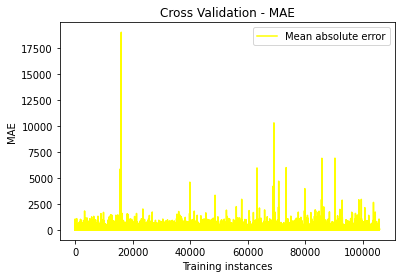

In [52]:
mae = []
for pred, actual in zip(y_cv, y_actual):
  mae.append(abs(pred-actual))
plt.plot(mae, color = 'yellow', label = 'Mean absolute error')
plt.title('Cross Validation - MAE')
plt.xlabel('Training instances')
plt.ylabel('MAE')
plt.legend()
    
plt.show()



In [53]:
sum(mae)/len(y_cv)

array([32.54090489])

In [54]:
regressor.predict(X_test) #predictions

array([[  441.1955],
       [  598.9335],
       [  369.6735],
       ...,
       [  658.6665],
       [  132.279 ],
       [16371.059 ]])

denormalizing test values

In [55]:
real_stock_price = Y_test
real_stock_price = np.pad(real_stock_price,((0,0),(0,FEATURES-1)),'constant')
real_stock_price = sc.inverse_transform(real_stock_price)
real_stock_price = np.delete(real_stock_price, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], axis=1)

In [56]:
regressor.final_estimator_pred[:10], real_stock_price[:10]

(array([[ 441.1955],
        [ 598.9335],
        [ 369.6735],
        [ 188.6695],
        [ 391.2845],
        [ 304.211 ],
        [ 283.3765],
        [1456.472 ],
        [ 802.22  ],
        [ 379.9095]]), array([[ 445.4 ],
        [ 594.  ],
        [ 376.3 ],
        [ 186.85],
        [ 395.6 ],
        [ 309.1 ],
        [ 282.25],
        [1462.75],
        [ 806.95],
        [ 389.25]]))

#Outputs

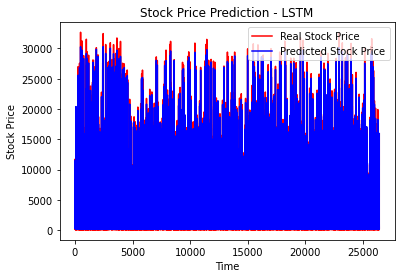

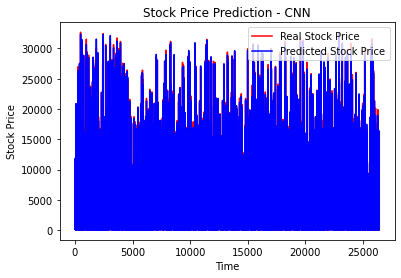

In [57]:
regressor.plot_individual(real_stock_price)


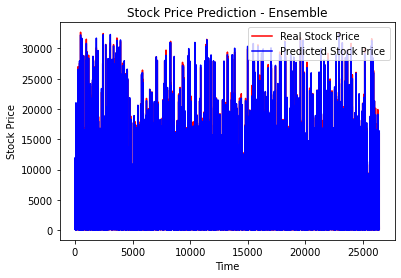

In [58]:
regressor.plot_final(real_stock_price)

#Performance

In [59]:
regressor.performance(real_stock_price)

Performace Evaluation - LSTM

RMSE: 175.09359222002283
MAE: 115.9935393611405
MAPE: 26.39599611208964



Performace Evaluation - CNN

RMSE: 78.2512396401411
MAE: 31.238344330692186
MAPE: 3.5142947975899586



Performance Evaluation - Ensemble
RMSE: 82.38857724682083
MAE: 29.894661651227636
MAPE: 2.3762065939189236


#Validation - 2022 data

In [60]:
df_testing

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company_Code,score
0,730.30,732.00,738.65,730.50,736.10,736.60,734.71,2377227,1.746569e+14,35951.0,858021.0,0.3609,0,0.118898
1,736.60,743.00,747.00,732.65,739.00,739.25,739.81,4068551,3.009963e+14,53338.0,753275.0,0.1851,0,0.118898
2,739.25,739.00,758.80,734.05,754.00,754.90,749.01,5409002,4.051370e+14,66305.0,1528262.0,0.2825,0,0.118898
3,754.90,748.90,748.90,730.10,739.00,739.80,737.24,5440633,4.011033e+14,79602.0,1494295.0,0.2747,0,0.118898
4,739.80,744.70,747.70,730.50,736.00,736.10,738.20,2590751,1.912499e+14,43599.0,643885.0,0.2485,0,0.118898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,259.45,262.00,264.05,259.30,261.00,261.00,261.63,6874717,1.798606e+14,104910.0,2174704.0,0.3163,48,0.000000
3965,261.00,260.00,261.25,252.30,253.30,253.80,255.66,9546533,2.440628e+14,76628.0,2703588.0,0.2832,48,0.000000
3966,253.80,256.35,256.80,247.60,256.40,255.60,251.84,13389263,3.371917e+14,107614.0,3822847.0,0.2855,48,0.000000
3967,255.60,258.50,259.35,247.00,247.95,248.15,251.71,10858160,2.733099e+14,68711.0,3218625.0,0.2964,48,0.000000


Feature vector

In [61]:
real_stock_price = df_testing.values
lenOfReal = len(real_stock_price) 
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs_test = []
for i in range(DAYS, len(inputs)):
  inputs_test.append(inputs[i-DAYS:i, 0:FEATURES])
inputs_test = np.array(inputs_test)
inputs_test = np.reshape(inputs_test, (inputs_test.shape[0], inputs_test.shape[1], FEATURES))

In [62]:
regressor.predict(inputs_test)

array([[697.507 ],
       [697.3915],
       [725.606 ],
       ...,
       [260.0655],
       [264.775 ],
       [255.7265]])

In [63]:
real_stock_price = df_testing.iloc[DAYS:lenOfReal+1,5:6].values

Output

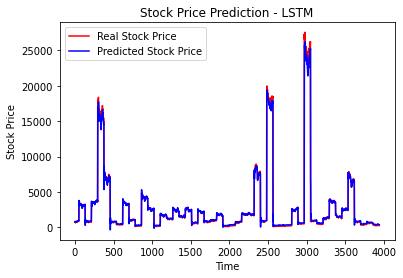

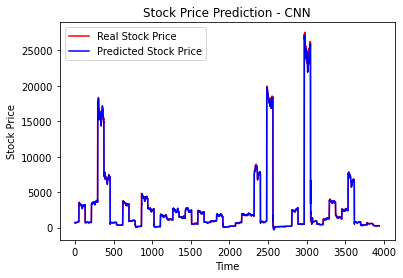

In [64]:
regressor.plot_individual(real_stock_price)

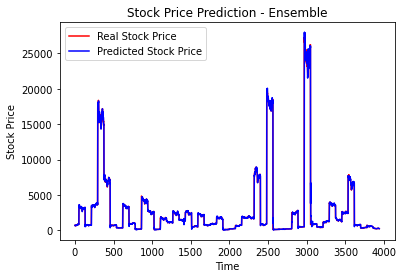

In [65]:
regressor.plot_final(real_stock_price)

Performance

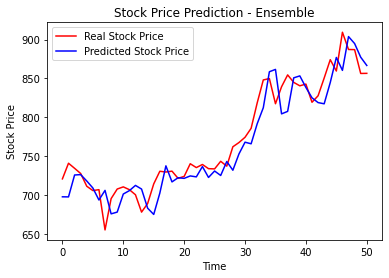

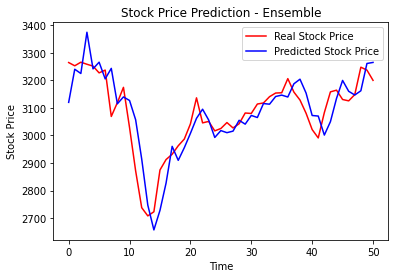

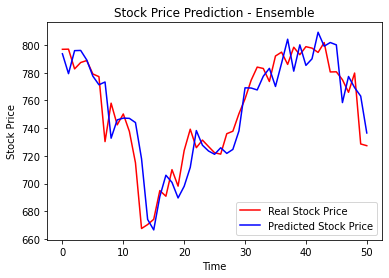

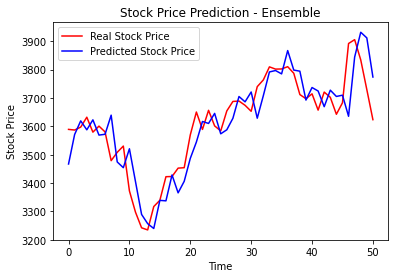

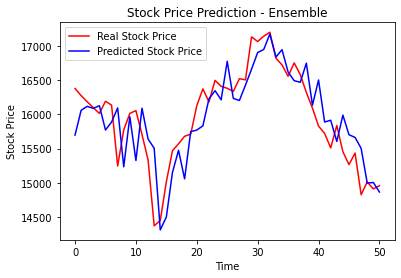

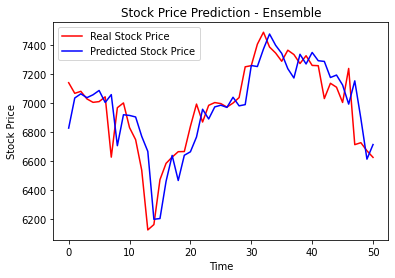

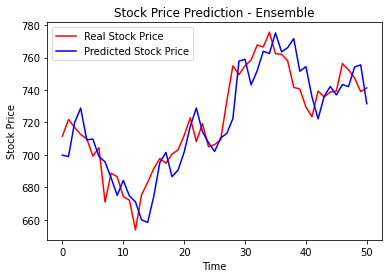

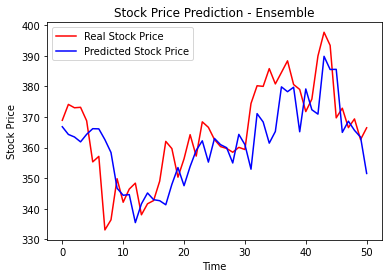

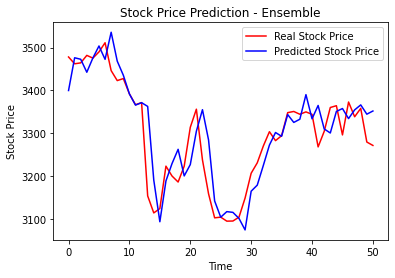

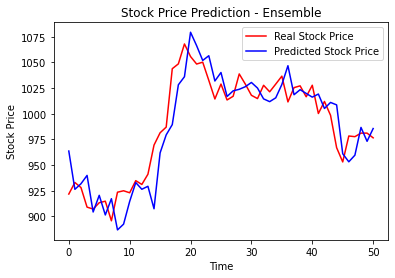

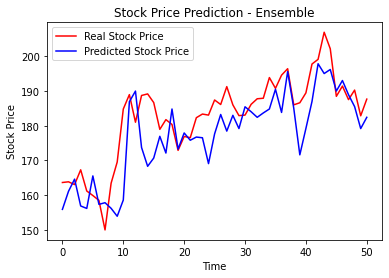

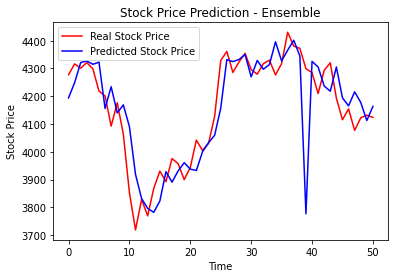

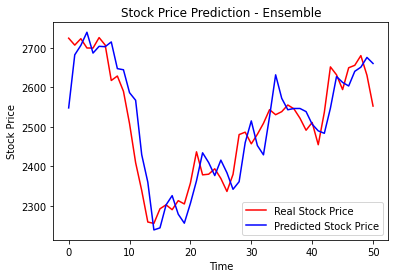

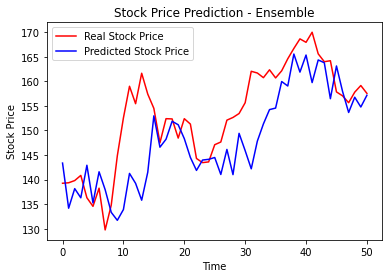

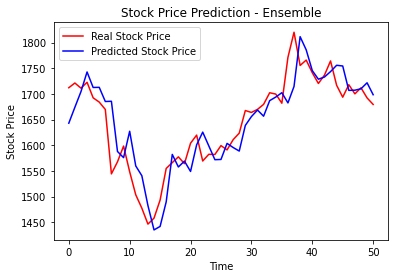

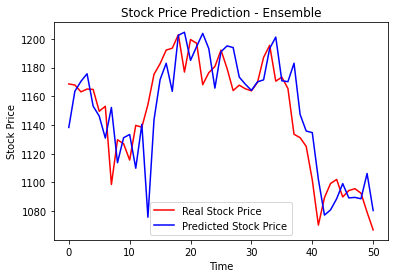

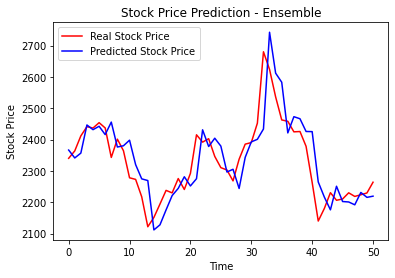

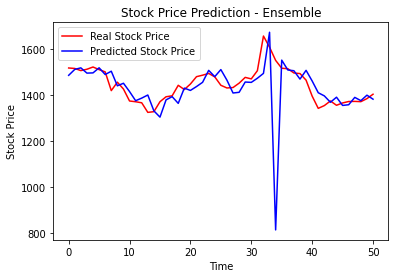

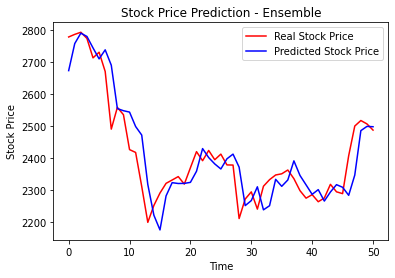

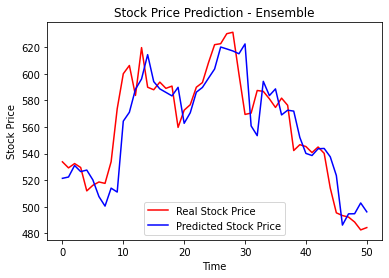

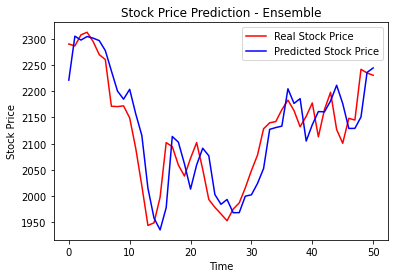

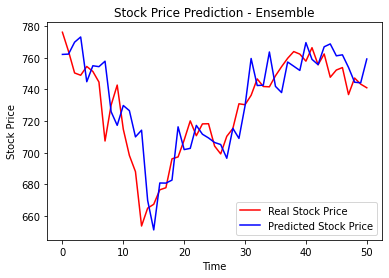

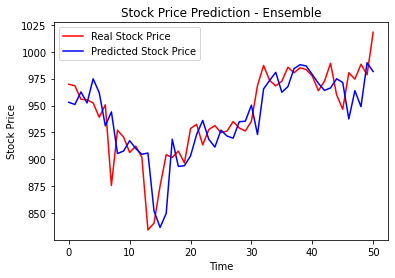

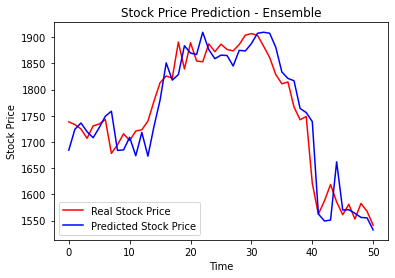

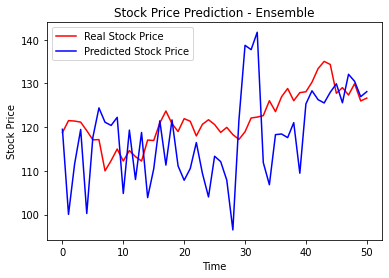

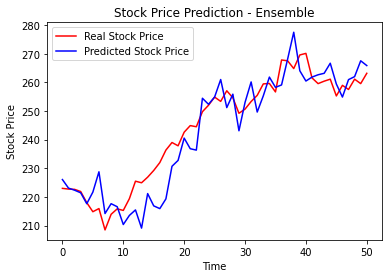

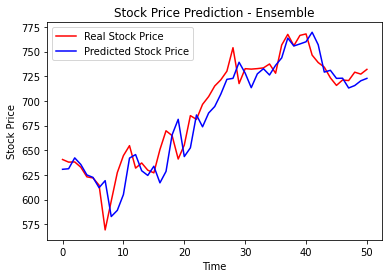

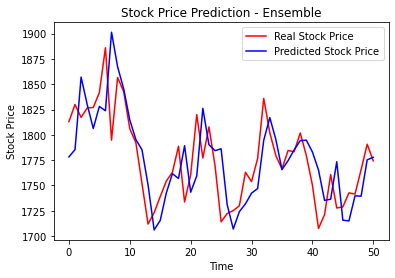

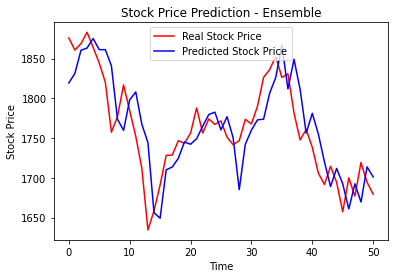

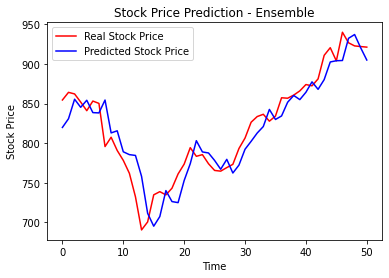

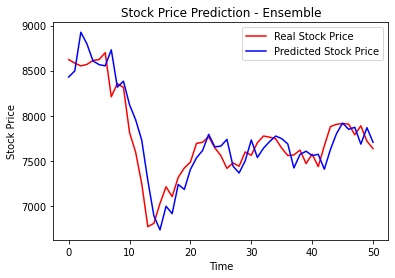

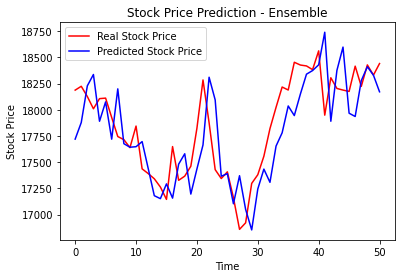

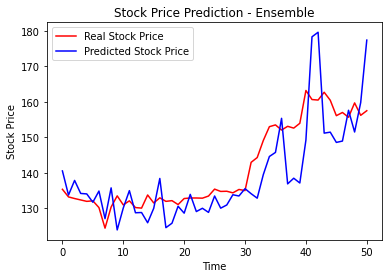

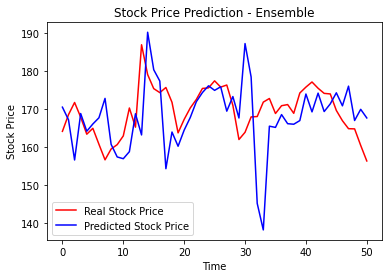

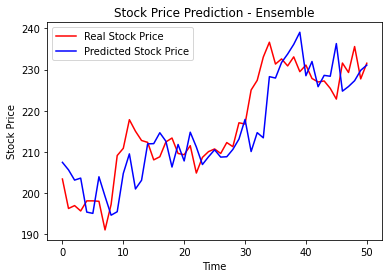

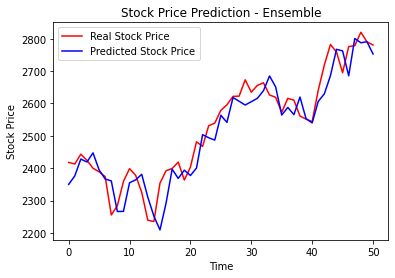

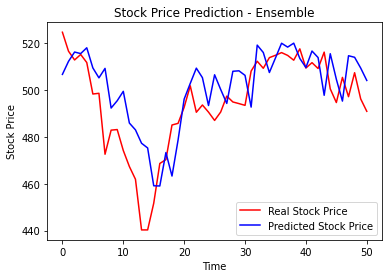

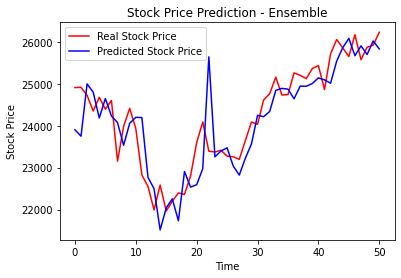

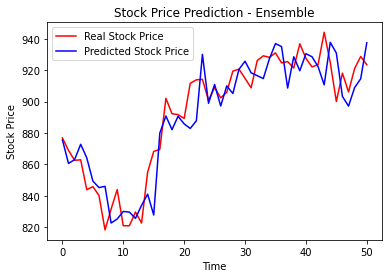

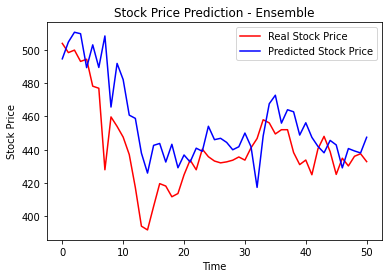

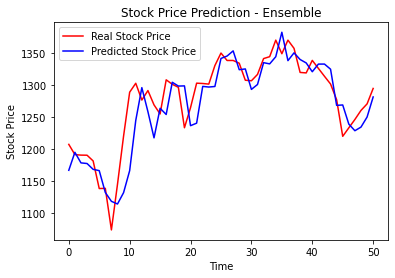

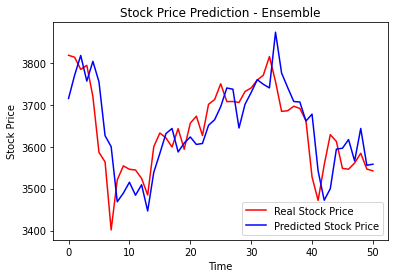

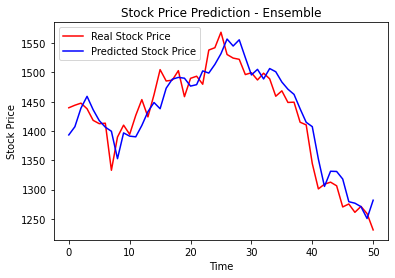

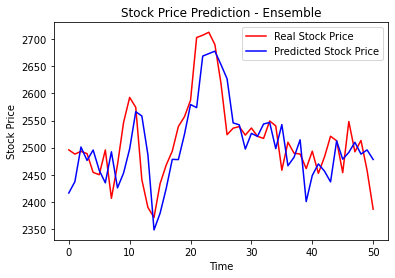

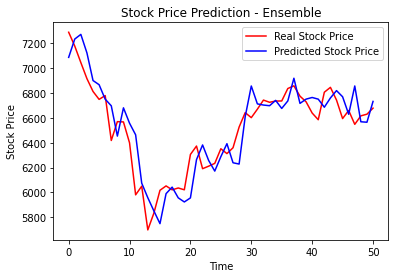

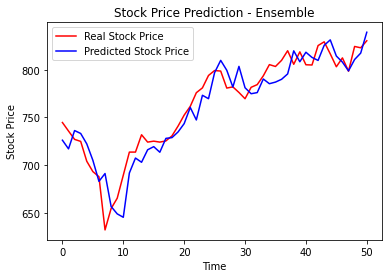

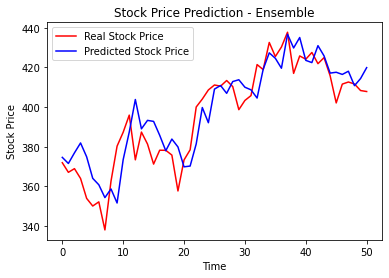

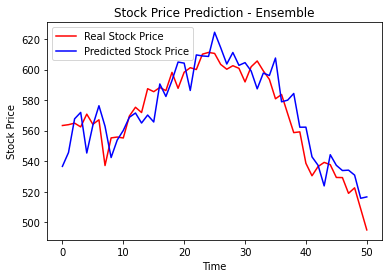

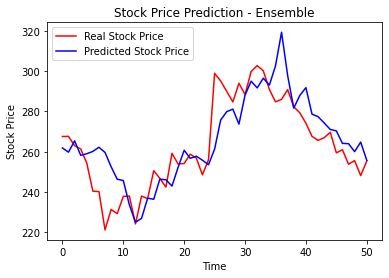

In [66]:
for i in range(49):
  tmp = df_testing[df_testing['Company_Code'] == i]
  real_stock_price = tmp.values
  lenOfReal = len(real_stock_price) 
  inputs = real_stock_price
  inputs = sc.transform(inputs)
  inputs_test = []
  for i in range(DAYS, len(inputs)):
    inputs_test.append(inputs[i-DAYS:i, 0:FEATURES])
  inputs_test = np.array(inputs_test)
  inputs_test = np.reshape(inputs_test, (inputs_test.shape[0], inputs_test.shape[1], FEATURES))
  regressor.predict(inputs_test)
  real_stock_price = tmp.iloc[DAYS:lenOfReal+1,5:6].values
  regressor.plot_final(real_stock_price)